In [59]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

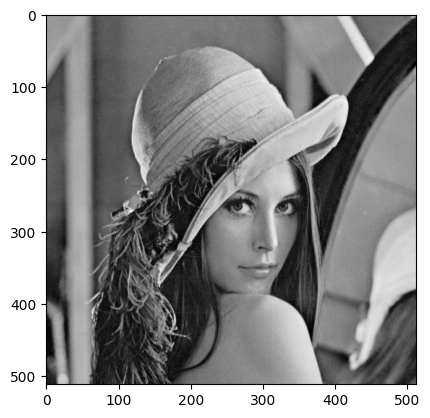

In [60]:
# open 'lena.png' as greyscale image
img = Image.open(r"lena.png").convert("L")
img = np.asarray(img)
plt.imshow(img, cmap='gray')
plt.show()


In [61]:
# get the binary representation for every pixel with fixed width
binary_img = np.vectorize(np.binary_repr)(img, width=8)
print(binary_img)

[['10100010' '10100010' '10100010' ... '10101010' '10011011' '10000000']
 ['10100010' '10100010' '10100010' ... '10101010' '10011011' '10000000']
 ['10100010' '10100010' '10100010' ... '10101010' '10011011' '10000000']
 ...
 ['00101011' '00101011' '00110010' ... '01101000' '01100100' '01100010']
 ['00101100' '00101100' '00110111' ... '01101000' '01101001' '01101100']
 ['00101100' '00101100' '00110111' ... '01101000' '01101001' '01101100']]


In [62]:
def get_bit(x, n):
  '''
  Returns the bit at position n from right to left. When n=0, least significant bit is returned.
  '''
  return int(x[(-1)-n])

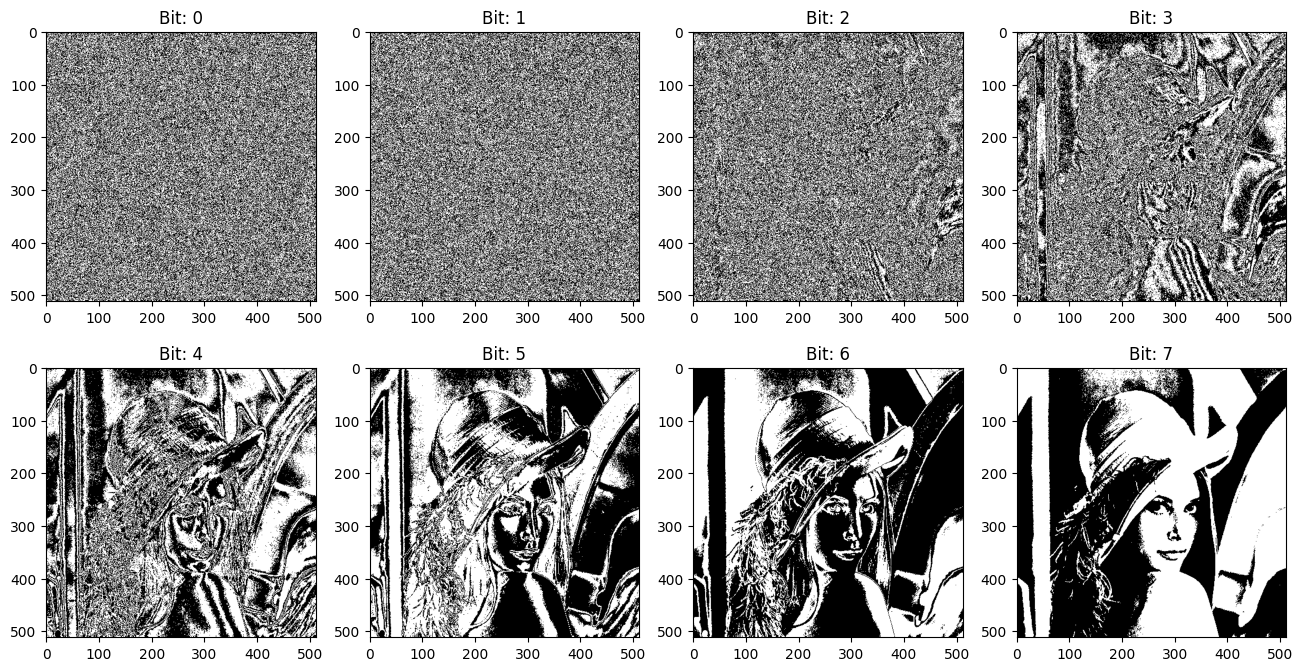

In [66]:
# display the image using the least to most significant bits
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axs = axs.ravel()
num_bits = 8
for i in range(num_bits):
  # return a binary mask using the bit value at position i
  # The most information is contained within the most significant bits, allowing for compression of image information
  bits = np.vectorize(get_bit)(binary_img, i)
  axs[i].imshow(bits, cmap='gray')
  axs[i].set_title(f"Bit: {i}")

plt.show()